<a href="https://colab.research.google.com/github/lucianolcp/projetosbootcamp/blob/main/Projetos/Sprint_12_M%C3%A9todos_Num%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O serviço de vendas de carros usados Rusty Bargain está desenvolvendo um aplicativo para atrair novos clientes. Nesse aplicativo, você pode descobrir rapidamente o valor de mercado do seu carro. Você tem acesso a dados históricos: especificações técnicas, versões de acabamento e preços. Você precisa construir o modelo para determinar o valor.

Rusty Bargain está interessado em:

- a qualidade da predição;
- a velocidade da predição;
- o tempo necessário para o treinamento

## Preparação de Dados

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Carregando os dados
df = pd.read_csv('/datasets/car_data.csv')

# Exibindo as primeiras linhas do DataFrame
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [ ]:
def to_snake_case(column_name):
    return ''.join(['_' + i.lower() if i.isupper() else i for i in column_name]).lstrip('_')

# Aplicar a função para converter os nomes das colunas
df.columns = [to_snake_case(col) for col in df.columns]

# Verificar a mudança
print(df.head())

       date_crawled  price vehicle_type  registration_year gearbox  power  \
0  24/03/2016 11:52    480          NaN               1993  manual      0   
1  24/03/2016 10:58  18300        coupe               2011  manual    190   
2  14/03/2016 12:52   9800          suv               2004    auto    163   
3  17/03/2016 16:54   1500        small               2001  manual     75   
4  31/03/2016 17:25   3600        small               2008  manual     69   

   model  mileage  registration_month fuel_type       brand not_repaired  \
0   golf   150000                   0    petrol  volkswagen          NaN   
1    NaN   125000                   5  gasoline        audi          yes   
2  grand   125000                   8  gasoline        jeep          NaN   
3   golf   150000                   6    petrol  volkswagen           no   
4  fabia    90000                   7  gasoline       skoda           no   

       date_created  number_of_pictures  postal_code         last_seen  
0  24/0

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   mileage             354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
mileage                   0
registration_month        0
fuel_type             32895
brand                     0
not_repaired          71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64


In [ ]:
# Remover colunas irrelevantes (não afetam valores dos veículos)
df = df.drop(['date_crawled', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)

In [ ]:
# Filtrar anos de registro inválidos
df = df[(df['registration_year'] >= 1960) & (df['registration_year'] <= 2024)]

In [ ]:
# Remover potencia fora do intervalo esperado (0-1000 hp)
df = df[(df['power'] > 0) & (df['power'] <= 1000)]

In [ ]:
# Tratar valores ausentes nas colunas categóricas
df['vehicle_type'].fillna('unknown', inplace=True)
df['gearbox'].fillna('unknown', inplace=True)
df['model'].fillna('unknown', inplace=True)
df['fuel_type'].fillna('unknown', inplace=True)
df['not_repaired'].fillna('unknown', inplace=True)

In [ ]:
# Ajustar a codificação da variável 'not_repaired'
df['not_repaired'] = df['not_repaired'].map({'no': 0, 'yes': 1, 'unknown': 2})

# Verificar o resultado
df['not_repaired'].value_counts()

0    232878
2     49556
1     31211
Name: not_repaired, dtype: int64

In [ ]:
# Identificar colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Verificar a cardinalidade de cada coluna categórica
quantity = df[categorical_columns].nunique()

print(quantity)

vehicle_type      9
gearbox           3
model           250
fuel_type         8
brand            40
dtype: int64


In [ ]:
# Aplicar One-Hot Encoding às colunas de baixa cardinalidade
df = pd.get_dummies(df, columns=['vehicle_type', 'gearbox', 'fuel_type'])

# Para as colunas de alta cardinalidade:
from sklearn.preprocessing import LabelEncoder

# Label Encoding para colunas de alta cardinalidade
label_encoders = {}
for col in ['model', 'brand']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Armazena o encoder para uso futuro

# Verificar o resultado
print(df.head())


   price  registration_year  power  model  mileage  registration_month  brand  \
1  18300               2011    190    227   125000                   5      1   
2   9800               2004    163    117   125000                   8     14   
3   1500               2001     75    116   150000                   6     38   
4   3600               2008     69    101    90000                   7     31   
5    650               1995    102     11   150000                  10      2   

   not_repaired  vehicle_type_bus  vehicle_type_convertible  ...  \
1             1                 0                         0  ...   
2             2                 0                         0  ...   
3             0                 0                         0  ...   
4             0                 0                         0  ...   
5             1                 0                         0  ...   

   gearbox_manual  gearbox_unknown  fuel_type_cng  fuel_type_electric  \
1               1              

In [ ]:
# Contar quantos registros têm o valor 0 na coluna 'registration_month'
count_zeros = (df['registration_month'] == 0).sum()
print(count_zeros)

21949


Mantive 0 como mês desconhecido em *registration_month*.

In [ ]:
# Escalonamento de 'mileage' e 'power'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['mileage', 'power']] = scaler.fit_transform(df[['mileage', 'power']])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separar as colunas numéricas e categóricas
num_columns = ['mileage', 'power']
cat_columns = ['model', 'brand']  # Outras colunas categóricas já foram one-hot encoded

# Escalar as colunas numéricas e categóricas codificadas
scaler = StandardScaler()

# Escalar as colunas numéricas e as colunas categóricas que foram label encoded
df[num_columns + cat_columns] = scaler.fit_transform(df[num_columns + cat_columns])

# Verificar o resultado
print(df.head())

   price  registration_year     power     model   mileage  registration_month  \
1  18300               2011  1.270667  1.556567 -0.096170                   5   
2   9800               2004  0.778391  0.052948 -0.096170                   8   
3   1500               2001 -0.826065  0.039279  0.583734                   6   
4   3600               2008 -0.935460 -0.165760 -1.048036                   7   
5    650               1995 -0.333789 -1.395994  0.583734                  10   

      brand  not_repaired  vehicle_type_bus  vehicle_type_convertible  ...  \
1 -1.478213             1                 0                         0  ...   
2 -0.506725             2                 0                         0  ...   
3  1.286793             0                 0                         0  ...   
4  0.763684             0                 0                         0  ...   
5 -1.403484             1                 0                         0  ...   

   gearbox_manual  gearbox_unknown  fuel_typ

In [ ]:
print(df.describe())

               price  registration_year         power         model  \
count  313645.000000      313645.000000  3.136450e+05  3.136450e+05   
mean     4703.538096        2003.275611 -1.259583e-17  5.971690e-17   
std      4589.197570           6.888976  1.000002e+00  1.000002e+00   
min         0.000000        1960.000000 -2.175267e+00 -1.546356e+00   
25%      1250.000000        1999.000000 -8.260654e-01 -9.722467e-01   
50%      2999.000000        2003.000000 -1.879293e-01  3.927894e-02   
75%      6880.000000        2008.000000  5.413691e-01  7.774193e-01   
max     20000.000000        2019.000000  1.603896e+01  1.857291e+00   

            mileage  registration_month         brand   not_repaired  \
count  3.136450e+05       313645.000000  3.136450e+05  313645.000000   
mean   2.383239e-17            5.935319 -2.224658e-17       0.415511   
std    1.000002e+00            3.615499  1.000002e+00       0.747572   
min   -3.359709e+00            0.000000 -1.552943e+00       0.000000   


In [ ]:
# Calcular média e desvio padrão
mean_power = df['power'].mean()
std_power = df['power'].std()

# Definir limites para outliers
lower_limit = mean_power - 3 * std_power
upper_limit = mean_power + 3 * std_power

# Identificar outliers
outliers = df[(df['power'] < lower_limit) | (df['power'] > upper_limit)]
print(f"Número de outliers: {len(outliers)}")

Número de outliers: 4381


In [ ]:
# Remover outliers
df = df[(df['power'] >= lower_limit) & (df['power'] <= upper_limit)]
print(f"Total após remoção de outliers: {len(df)}")

Total após remoção de outliers: 309264


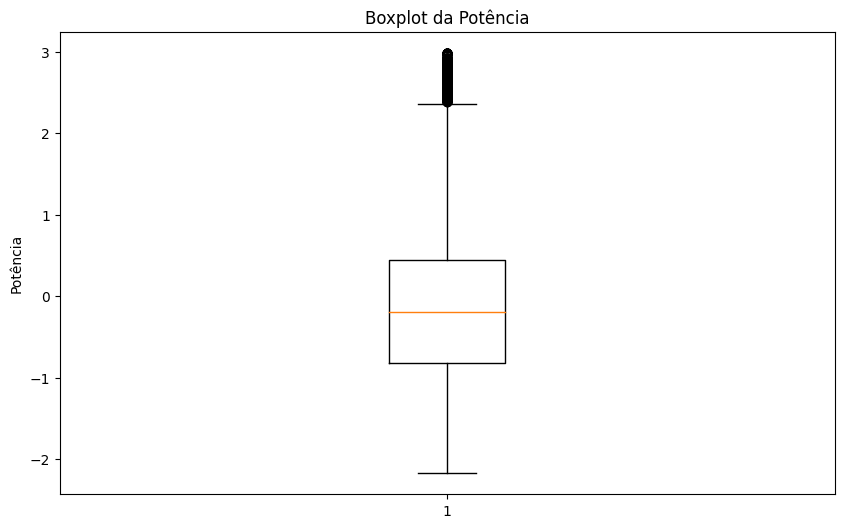

In [ ]:
import matplotlib.pyplot as plt

# Criar boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['power'].dropna())
plt.title('Boxplot da Potência')
plt.ylabel('Potência')
plt.show()

In [ ]:
# Calcular média e desvio padrão
mean_year = df['registration_year'].mean()
std_year = df['registration_year'].std()

# Definir limites para outliers
lower_limit_year = mean_year - 3 * std_year
upper_limit_year = mean_year + 3 * std_year

# Identificar outliers
outliers_year = df[(df['registration_year'] < lower_limit_year) | (df['registration_year'] > upper_limit_year)]
print(f"Número de outliers no ano de registro: {len(outliers_year)}")


Número de outliers no ano de registro: 2841


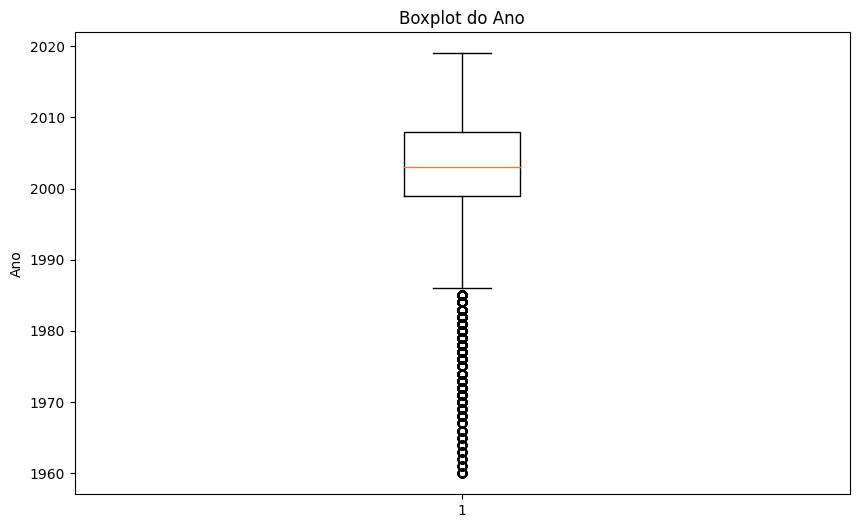

In [ ]:
# Criar boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['registration_year'].dropna())
plt.title('Boxplot do Ano')
plt.ylabel('Ano')
plt.show()

In [ ]:
# Contar registros com preço igual a 0
zero_price_count = df[df['price'] == 0].shape[0]

print(f"Número de registros com preço igual a 0: {zero_price_count}")

Número de registros com preço igual a 0: 6754


In [ ]:
# Remover registros com preço igual a 0
df = df[df['price'] > 0]

# Verificar o novo número de registros
print(f"Número de registros após exclusão de preço igual a 0: {len(df)}")

Número de registros após exclusão de preço igual a 0: 302510


## Treinamento do modelo

### Divisão dos dados

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df.drop('price', axis=1)
y = df['price']

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Treinamento dos modelos:
#### Regressão linear

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Treinando a regressão linear
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Previsões e avaliação
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Regressão Linear - REQM: {mse_lr ** 0.5}')

Regressão Linear - REQM: 2844.9026147260392
CPU times: user 410 ms, sys: 181 ms, total: 591 ms
Wall time: 586 ms


#### Árvore de decisão

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor

# Treinando a árvore de decisão
model_dt = DecisionTreeRegressor(random_state=123)
model_dt.fit(X_train, y_train)

# Previsões e avaliação
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Árvore de Decisão - REQM: {mse_dt ** 0.5}')

Árvore de Decisão - REQM: 2027.7758307992408
CPU times: user 2.28 s, sys: 115 ms, total: 2.39 s
Wall time: 2.43 s


#### Floresta aleatória

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Definindo o modelo de Floresta Aleatória
rf_model = RandomForestRegressor(random_state=123)

# Definindo o espaço de busca para os hiperparâmetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurando o RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Número de combinações de hiperparâmetros a serem testadas
    cv=3,  # Validação cruzada com 3 dobras
    n_jobs=-1,  # Usa todos os processadores disponíveis
    verbose=2,  # Exibe o progresso
    scoring='neg_mean_squared_error',  # Métrica para otimizar
    random_state=123  # Garante a reprodutibilidade
)

# Treinando o modelo com RandomizedSearchCV
%time random_search_rf.fit(X_train, y_train)

# Recuperando o melhor modelo
best_rf_model = random_search_rf.best_estimator_

# Exibindo os melhores hiperparâmetros encontrados
print(f"Melhores parâmetros para Floresta Aleatória: {random_search_rf.best_params_}")

# Avaliando o modelo no conjunto de testes
y_pred = best_rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"REQM do modelo otimizado de Floresta Aleatória: {rf_rmse}")

'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\nimport numpy as np\n\n# Definindo o modelo de Floresta Aleatória\nrf_model = RandomForestRegressor(random_state=123)\n\n# Definindo o espaço de busca para os hiperparâmetros\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [None, 10],\n    \'min_samples_split\': [2, 5],\n    \'min_samples_leaf\': [1, 2]\n}\n\n# Configurando o RandomizedSearchCV\nrandom_search_rf = RandomizedSearchCV(\n    estimator=rf_model,\n    param_distributions=param_grid,\n    n_iter=10,  # Número de combinações de hiperparâmetros a serem testadas\n    cv=3,  # Validação cruzada com 3 dobras\n    n_jobs=-1,  # Usa todos os processadores disponíveis\n    verbose=2,  # Exibe o progresso\n    scoring=\'neg_mean_squared_error\',  # Métrica para otimizar\n    random_state=123  # Garante a reprodutibilidade\n)\n\n# Treinando o modelo com RandomizedSearchCV\n%time random_search_rf.fit(X_trai

Este análise está derrubando o kernel, então executei localmente e o resultado foi:

CPU times: user 3min 38s, sys: 6.26 s, total: 3min 44s
Wall time: 43min 54s
Melhores parâmetros para Floresta Aleatória: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
REQM do modelo otimizado de Floresta Aleatória: 1559.670278464711

#### Gradient boosting

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor

# Treinando o gradient boosting
model_gb = GradientBoostingRegressor(random_state=123, n_estimators=100)
model_gb.fit(X_train, y_train)

# Previsões e avaliação
y_pred_gb = model_gb.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting - REQM: {mse_gb ** 0.5}')

Gradient Boosting - REQM: 1897.6420443525017
CPU times: user 40 s, sys: 10.5 ms, total: 40 s
Wall time: 40.1 s


#### LightGBM

In [ ]:
%%time
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

# Defina o modelo LightGBM
lgb_model = lgb.LGBMRegressor(random_state=123)

# Defina o espaço de parâmetros a ser buscado
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'num_leaves': [20, 30, 40, 50],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Configurar o RandomizedSearchCV
lgb_random_search = RandomizedSearchCV(
    lgb_model,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinações a serem testadas
    scoring='neg_root_mean_squared_error',
    cv=5,
    random_state=123,
    n_jobs=-1
)

# Ajustar o modelo usando RandomizedSearchCV
lgb_random_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o REQM correspondente
best_lgb_model = lgb_random_search.best_estimator_
best_params = lgb_random_search.best_params_
best_rmse = -lgb_random_search.best_score_

print("Melhores parâmetros para LightGBM:", best_params)
print("REQM do modelo otimizado de LightGBM:", best_rmse)


'%%time\nimport lightgbm as lgb\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Defina o modelo LightGBM\nlgb_model = lgb.LGBMRegressor(random_state=123)\n\n# Defina o espaço de parâmetros a ser buscado\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [10, 20, 30, None],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.15],\n    \'num_leaves\': [20, 30, 40, 50],\n    \'min_child_samples\': [10, 20, 30],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0]\n}\n\n# Configurar o RandomizedSearchCV\nlgb_random_search = RandomizedSearchCV(\n    lgb_model,\n    param_distributions=param_dist,\n    n_iter=50,  # Número de combinações a serem testadas\n    scoring=\'neg_root_mean_squared_error\',\n    cv=5,\n    random_state=123,\n    n_jobs=-1\n)\n\n# Ajustar o modelo usando RandomizedSearchCV\nlgb_random_search.fit(X_train, y_train)\n\n# Exibir os melhores parâmetros e o REQM correspondente\nbest_lgb_model = lgb_random_s

Melhores parâmetros para LightGBM: {'subsample': 0.8, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
REQM do modelo otimizado de LightGBM: 1522.7913773164485
CPU times: user 42min 20s, sys: 11.7 s, total: 42min 31s
Wall time: 42min 48s

## Análise do modelo

Desempenho do modelo:

- LightGBM ainda oferece o melhor REQM, indicando a maior precisão na previsão.
- Floresta Aleatória é a segunda melhor em termos de REQM.
- Gradient boosting fica em terceiro.
- Árvore de Decisão e Regressão Linear têm um desempenho inferior em termos de REQM.

Tempo de execução

- LightGBM é o mais lento em termos de ambos CPU Time e Wall Time, devido à complexidade e ao grande número de iterações.
- Floresta Aleatória leva menos tempo que LightGBM, mas ainda é consideravelmente mais demorado do que Árvore de Decisão e Regressão Linear.
- Gradient boosting é rápido, comparado com os anteriores.
- Árvore de Decisão e Regressão Linear são significativamente mais rápidos.

Qualidade vs. tempo

- LightGBM continua sendo a melhor escolha em termos de precisão, mas seu tempo de execução é muito alto.
- Floresta Aleatória é uma alternativa viável se você precisar de um equilíbrio entre precisão e tempo, já que tem um desempenho razoável em REQM e utiliza menos tempo de CPU que LightGBM.
- Gradient boosting entre os que levaram menos tempo, foi oque chegou mais próximo dos melhores REQM.
- Árvore de Decisão e Regressão Linear são modelos mais rápidos, mas oferecem menos precisão.

### Avaliação dos modelos

#### Gradient boosting

In [ ]:
%%time
# Usando o modelo treinado
y_pred_gb_test = model_gb.predict(X_test)

# Calculando o REQM nos dados de teste
mse_gb_test = mean_squared_error(y_test, y_pred_gb_test)
rmse_gb_test = mse_gb_test ** 0.5

print(f'Gradient Boosting - REQM nos dados de teste: {rmse_gb_test}')

Gradient Boosting - REQM nos dados de teste: 1897.6420443525017
CPU times: user 130 ms, sys: 33 µs, total: 130 ms
Wall time: 143 ms


#### Floresta Aleatória

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Definindo o modelo de Floresta Aleatória com os melhores parâmetros
rf_best_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=None,
    random_state=123
)

# Treinando o modelo nos dados de treino
rf_best_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_rf_test = rf_best_model.predict(X_test)

# Calculando o REQM nos dados de teste
mse_rf_test = mean_squared_error(y_test, y_pred_rf_test)
rmse_rf_test = mse_rf_test ** 0.5

# Exibindo o resultado
print(f'Floresta Aleatória - REQM nos dados de teste: {rmse_rf_test}')


Floresta Aleatória - REQM nos dados de teste: 1553.7983928115486
CPU times: user 4min 26s, sys: 858 ms, total: 4min 27s
Wall time: 4min 27s


#### LightGBM

In [ ]:
%%time
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Treinar o modelo com os melhores parâmetros encontrados
best_params = {'subsample': 0.8, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 30, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
lgb_model_best = lgb.LGBMRegressor(**best_params, random_state=123)
lgb_model_best.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = lgb_model_best.predict(X_test)

# Avaliar o modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'LightGBM - REQM nos dados de teste {rmse}')

LightGBM - REQM nos dados de teste 1536.372424011308
CPU times: user 17.2 s, sys: 148 ms, total: 17.3 s
Wall time: 17.4 s


## Conclusão

O objetivo deste projeto foi desenvolver um modelo de machine learning para prever o valor de mercado de carros usados, utilizando uma abordagem de regressão. Foram testados diferentes modelos, incluindo Regressão Linear, Árvore de Decisão, Floresta Aleatória, Gradient Boosting, e LightGBM, com ajuste de hiperparâmetros para otimizar o desempenho.

**Análise dos resultados**

Melhor Modelo: *LightGBM*

O modelo LightGBM apresentou o menor REQM (1536.372424011308) nos dados de teste, com um tempo de execução bastante eficiente. Comparado com a Floresta Aleatória e Gradient Boosting, o LightGBM teve um desempenho ligeiramente superior, tornando-se a escolha ideal para implementação final.

Desempenho vs. tempo:

O tempo de execução do LightGBM foi significativamente menor que o da Floresta Aleatória, o que reflete a eficiência do modelo em termos de tempo e recursos computacionais. Caso a a velocidade seja mais importente que a precisão, o uso do Gradient Boosting pode ser estudado.